In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as lk
plt.style.use('fivethirtyeight')

In [150]:
tickers = ['PG','^GSPC']
for i in tickers:
    prices =  pd.DataFrame(lk.DataReader(tickers,data_source ='yahoo',start = '2010-01-01' )['Adj Close'])

In [151]:
returns = np.log(prices/prices.shift(1))


<AxesSubplot:xlabel='Date'>

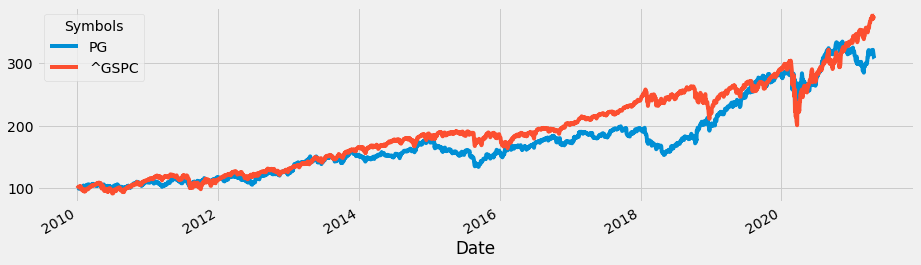

In [152]:
(prices/prices.iloc[0]*100).plot(figsize = (14,4))

In [153]:
num_assets = len(tickers)
weights = np.random.random(num_assets)
weights /= np.sum(weights)

In [154]:
weights[0] + weights[1]

1.0

In [160]:
port_returns = []
port_var = []

for i in range(1000):
    num_assets = len(tickers)
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    port_returns.append(np.sum(weights * returns.mean() * 250))
    port_var.append(np.dot(weights.T,np.dot(returns.cov()*250 * 0.5,weights)))

In [161]:
port_returns= np.array(port_returns)
port_var= np.array(port_var)

In [162]:
port_returns,port_var

(array([0.10906215, 0.11022739, 0.10785687, 0.10918179, 0.10753259,
        0.09912644, 0.10680132, 0.10123922, 0.10618995, 0.10863521,
        0.0986668 , 0.11084968, 0.09912375, 0.11025252, 0.10369144,
        0.1076416 , 0.11151354, 0.11072472, 0.1029984 , 0.0986497 ,
        0.11188842, 0.10403211, 0.10922714, 0.10909541, 0.10529858,
        0.10398997, 0.10982805, 0.1112393 , 0.10308582, 0.10708251,
        0.10799724, 0.10946758, 0.10741046, 0.10782252, 0.1078786 ,
        0.10089494, 0.10346476, 0.10896053, 0.11032234, 0.10869367,
        0.10536032, 0.10638507, 0.09926287, 0.10062903, 0.11050251,
        0.10420199, 0.10351244, 0.10456661, 0.10763399, 0.11073588,
        0.1133682 , 0.10647782, 0.10583038, 0.1079967 , 0.10560634,
        0.11032133, 0.10720861, 0.10583016, 0.11572679, 0.10883144,
        0.10900929, 0.10988537, 0.10716156, 0.10564831, 0.09896944,
        0.10663901, 0.11079308, 0.10651222, 0.10404757, 0.11066169,
        0.10188238, 0.10438863, 0.1091659 , 0.10

In [163]:
port = pd.DataFrame({'return' : port_returns,'variance':port_var})

<AxesSubplot:xlabel='variance', ylabel='return'>

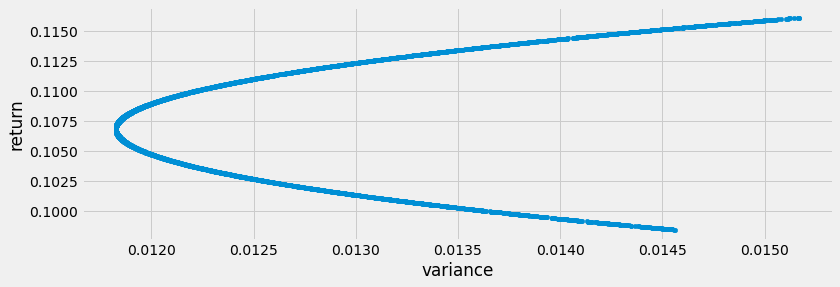

In [159]:
port.plot(x = 'variance',y = 'return',kind ='scatter',figsize = (12,4))